Logistic Regression Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Epoch 1/100
3/3 [==============================] - 1s 112ms/step - loss: 1.1480 - accuracy: 0.2083 - val_loss: 1.1305 - val_accuracy: 0.0833
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 1.0581 - accuracy: 0.2500 - val_loss: 1.0589 - val_accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.9795 - accuracy: 0.5729 - val_loss: 0.9959 - val_accuracy: 0.5417
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.9090 - accuracy: 0.6562 - val_loss: 0.9376 - val_accuracy: 0.6667
E

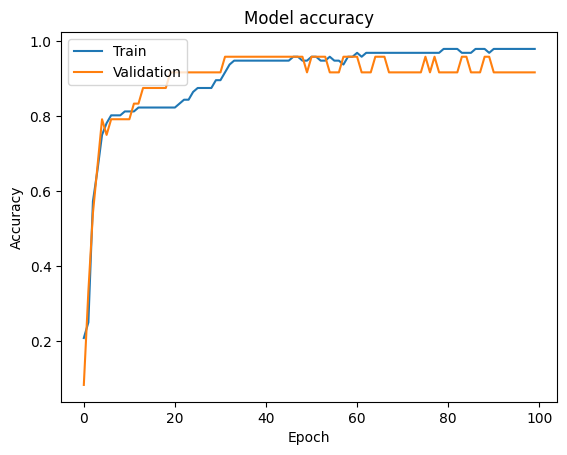

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)
loss, accuracy_tf = model.evaluate(X_test, y_test)
print("TensorFlow Neural Network Accuracy:", accuracy_tf)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
model.save('iris_model.h5')
